## Bootstrap Confidence Intervals

The **empirical bootstrap** is a technique popularized by Bradley Efron in 1979. It is easy to understand and implement, but is just recently gaining popularity, since it is not really feasible without modern computing power. The bootstrap allows us to substitute fast computation for theoretical math.

**Big Idea:** perform computations on the data itself to estimate the variation of statistics that are themselves computed from the same data. That is, the data is ‘pulling itself up by its own bootstrap.’ 

Since the bootstrap allows you to estimate the variance of the sampling distribution of these statistics, you can use this technique to construct confidence intervals.

Recall the procedure for building a 95% Bootstrap Conﬁdence Interval:

1. Given a sample, ﬁnd the sample statistic $s$. This is the **point estimate**.
2. Draw a large number (1,000 or so) resamples from the original sample and calculate the statistic $s^*$ for each.
3. Find the 0.025 and 0.975 quantiles of the set of $s^* - s$. We'll call them $a$ and $b$,respectively.
4. The 95% conﬁdence interval is given by $[s - b, s - a]$

In [1]:
import pandas as pd
import numpy as np

Let's see how we can create bootstap confidence intervals for different parameters.

For this notebook, we'll be working with the Palmer penguins dataset.

In [2]:
penguins = pd.read_csv('../data/penguins.csv').dropna()

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Bootstrap Confidence Intervals for a Single Parameter

Let's look just at the adelie penguins.

In [4]:
adelie = penguins[penguins['species'] == 'Adelie']

First, let's build a confidence interval for the mean body mass.

The first thing to do is to find our point estimate, the sample mean.

In [5]:
point_estimate = adelie['body_mass_g'].mean()
point_estimate

3706.1643835616437

Then set the number of resamples and the confidence level.

In [6]:
#Number of Resamples
num_resamples = 1000

#Confidence Level
conf_level = 0.95

Using the confidence level, we can determine the cutoff values.

In [7]:
margin = (1 - conf_level) / 2
margin

0.025000000000000022

We can extract out the sample values.

In [8]:
values = adelie['body_mass_g']

To resample these values, we can use the `choice` function from numpy's random module.

This function takes in a 1-D array and will randomly sample from that array (with replacement by default). We can also use the `size` parameter in order to draw all of our resamples simulataneously. To use this parameter, we'll give it a tuple containing the number of resamples that we want and the size of the resamples (the same size as the original dataset).

Here is an example use of this function:

In [9]:
np.random.choice([1,2,3], size = (5,3))

array([[2, 3, 2],
       [1, 3, 2],
       [2, 1, 1],
       [1, 3, 1],
       [2, 2, 1]])

Now, let's apply it to our sample values.

In [10]:
resamples = np.random.choice(values, size = (num_resamples, values.count()))

In [11]:
resamples

array([[3600., 4000., 3900., ..., 3700., 3900., 4300.],
       [3475., 4150., 3550., ..., 3550., 3050., 3550.],
       [4300., 3800., 4650., ..., 3550., 3300., 4150.],
       ...,
       [4150., 4000., 3500., ..., 3425., 3950., 3200.],
       [4600., 3450., 4300., ..., 4075., 3350., 3550.],
       [3475., 3200., 4300., ..., 3650., 3450., 3750.]])

Let's verify that this is the correct shape.

In [12]:
resamples.shape

(1000, 146)

This is an array where each row is a different resample. An advantage of creating the resamples in this way is that we can compute the mean values of all resamples simultaneously using the `mean` method. When doing this, we need to specify that we want to compute these using `axis = 1`, which indicates that we are computing the mean across the rows.

In [13]:
resamples.mean(axis = 1)

array([3706.67808219, 3750.        , 3641.95205479, 3656.84931507,
       3732.70547945, 3726.88356164, 3686.13013699, 3686.13013699,
       3672.43150685, 3678.93835616, 3696.74657534, 3718.49315068,
       3693.83561644, 3637.32876712, 3784.07534247, 3731.33561644,
       3706.50684932, 3746.91780822, 3692.80821918, 3652.39726027,
       3711.98630137, 3707.02054795, 3703.76712329, 3698.45890411,
       3632.87671233, 3687.15753425, 3680.1369863 , 3686.81506849,
       3730.47945205, 3763.52739726, 3711.47260274, 3690.23972603,
       3745.03424658, 3666.60958904, 3706.67808219, 3664.38356164,
       3714.38356164, 3729.79452055, 3733.73287671, 3669.69178082,
       3755.47945205, 3719.34931507, 3665.92465753, 3745.54794521,
       3728.93835616, 3709.76027397, 3745.71917808, 3704.10958904,
       3725.17123288, 3689.21232877, 3676.19863014, 3709.24657534,
       3729.10958904, 3674.82876712, 3711.98630137, 3675.34246575,
       3704.28082192, 3709.24657534, 3699.48630137, 3753.59589

To create out bootstrap samples, we need to compute the difference between the resample means and the point estimate.

In [14]:
diffs = resamples.mean(axis = 1) - point_estimate

Now, we can find the quantiles of these differences to get the upper and lower bounds.

In [15]:
a = np.quantile(diffs, q = margin)
b = np.quantile(diffs, q = 1 - margin)

print('lower bound: ', point_estimate - b)
print('upper bound: ', point_estimate - a)

lower bound:  3632.1875
upper bound:  3782.1917808219177


Let's condense all of the code into one cell.

In [16]:
num_resamples = 10000
conf_level = 0.95

margin = (1 - conf_level) / 2

values = adelie['body_mass_g']

point_estimate = values.mean()

resamples = np.random.choice(values, size = (num_resamples, values.count()))

diffs = resamples.mean(axis = 1) - point_estimate

a = np.quantile(diffs, q = margin)
b = np.quantile(diffs, q = 1 - margin)

print('lower bound: ', point_estimate - b)
print('upper bound: ', point_estimate - a)

lower bound:  3631.8450342465753
upper bound:  3779.2808219178078


Let's compare this to the $t$-interval, which we've seen before.

In [17]:
from scipy.stats import t, sem

In [18]:
t.interval(confidence = 0.95, 
           df = values.count() - 1, 
           loc = values.mean(), 
           scale = sem(values))

(3631.1465318672153, 3781.182235256072)

One major advantage of the bootstrap is that we can use it for statistics even when we don't know the exact sampling distribution. For example, let's find the 95% bootstrap confidence interval for the median.

Note that the median funtion is not built into numpy arrays, but we can use the `np.median` function and specify the axis for this calculation.

In [19]:
num_resamples = 10000
conf_level = 0.95

margin = (1 - conf_level) / 2

values = adelie['flipper_length_mm']

point_estimate = values.median()

resamples = np.random.choice(values, size = (num_resamples, values.count()))

diffs = np.median(resamples, axis = 1) - point_estimate

a = np.quantile(diffs, q = margin)
b = np.quantile(diffs, q = 1 - margin)

print('lower bound: ', point_estimate - b)
print('upper bound: ', point_estimate - a)

lower bound:  189.0
upper bound:  191.0


**Your Turn:** Modify the above code to find a 95% bootstrap confidence interval for the standard deviation of the flipper length.

In [20]:
# Your code here

### Bootstrap Confidence Interval for a Proportion

Now, let's see how we can create bootstrap confidence interval for a proportion.

For this, we'll work with a sample from the hotel booking demand dataset, which is described [here](https://www.sciencedirect.com/science/article/pii/S2352340918315191).

In [21]:
bookings = pd.read_csv('../data/bookings_sample.csv')

Specifically, let's estimate the proportion of reservations at city hotels that are canceled.

In order to quickly calculate a proportion, we can make use of the `mean` method of a numpy array. We can do this by checking that an observation is equal to a desired value and then using `mean` on the resulting array of Boolean values. (Note: in this case we do not have to check that the values are equal to 1 prior to using `mean`, but in cases where your variables are not encoded as 0/1, it would be necessary.)

First, let's see what the observed frequency of bookings that are canceled.

In [22]:
(bookings['is_canceled'] == 1).mean()

0.41

Now, we can largely reuse the code from above for our confidence interval.

In [23]:
num_resamples = 10000
conf_level = 0.95

margin = (1 - conf_level) / 2

values = bookings['is_canceled']

point_estimate = (values == 1).mean()

resamples = np.random.choice(values, size = (num_resamples, values.count()))

diffs = (resamples == 1).mean(axis = 1) - point_estimate

a = np.quantile(diffs, q = margin)
b = np.quantile(diffs, q = 1 - margin)

print('lower bound: ', point_estimate - b)
print('upper bound: ', point_estimate - a)

lower bound:  0.37999999999999995
upper bound:  0.43999999999999995


## Confidence Interval for a Difference

Sometimes, you may be interested in comparing the parameter value of two different groups. We can construct a confidence interval for the difference in parameters in a similar way as above, but we'll need to resample from each group.

For example, let's say we want to build a confidence interval for the difference in the mean body mass between adelie and chinstrap penguins.

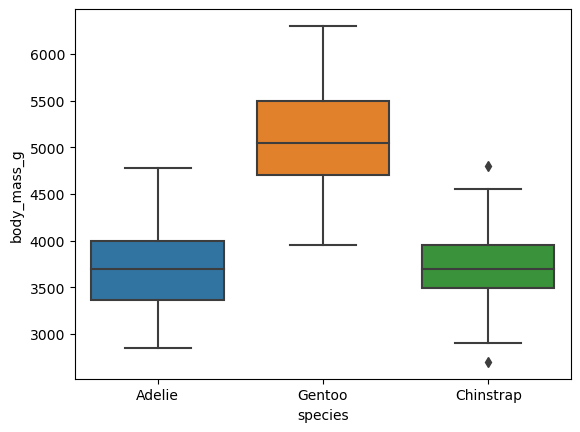

In [24]:
import seaborn as sns
sns.boxplot(data = penguins, x = 'species', y = 'body_mass_g');

In [25]:
chinstrap = penguins[penguins['species'] == 'Chinstrap']

chinstrap_values = chinstrap['body_mass_g']
adelie_values = adelie['body_mass_g']

num_resamples = 10000
conf_level = 0.95

margin = (1 - conf_level) / 2

chinstrap_resamples = np.random.choice(chinstrap_values, size = (num_resamples, chinstrap_values.count()))
adelie_resamples = np.random.choice(adelie_values, size = (num_resamples, adelie_values.count()))

point_estimate = chinstrap_values.mean() - adelie_values.mean()

diffs = chinstrap_resamples.mean(axis = 1) - adelie_resamples.mean(axis = 1) - point_estimate

a = np.quantile(diffs, q = margin)
b = np.quantile(diffs, q = 1 - margin)

print('lower bound: ', point_estimate - b)
print('upper bound: ', point_estimate - a)

lower bound:  -89.46980761482631
upper bound:  141.91944500402903


The fact that our confidence interval contains zero says that we can't immediately dismiss the possibility that adelie and chinstrap penguins have the same body mass on average.

## Confidence Interval for Correlation

Finally, let's see how we can construct a bootstrap confidence interval for a correlation coefficient.

First, let's remember how to find the correlation. Specifically, let's look at the correlation between flipper length and bill depth for adelie penguins.

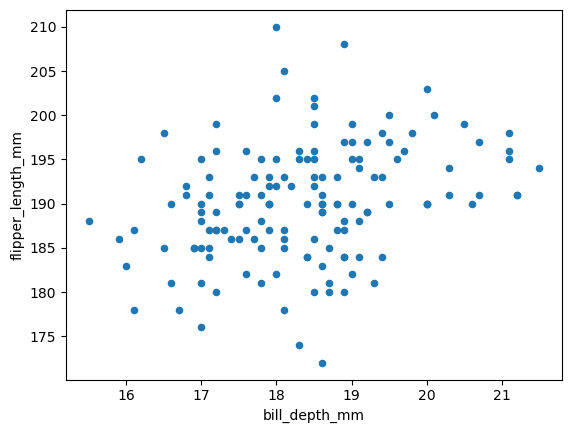

In [26]:
adelie.plot(kind = 'scatter', x = 'bill_depth_mm', y = 'flipper_length_mm');

In [27]:
adelie[['flipper_length_mm', 'bill_depth_mm']].corr()

,flipper_length_mm,bill_depth_mm
flipper_length_mm,1.000000,0.310897
bill_depth_mm,0.310897,1.000000


To extract just the correlation we care about, we can use the `iloc` accessor.

In [28]:
point_estimate = adelie[['flipper_length_mm', 'bill_depth_mm']].corr().iloc[0, 1]
point_estimate

0.3108973890693491

In order to use the `np.random.choice` function, we need a one-dimensional array. For this, we can use the index of the adelie DataFrame.

Note that the index object does not have a `count` method, but we can use the `len` function here.

In [29]:
values = adelie.index

resamples = np.random.choice(values, size = (num_resamples, len(values)))

What we have now is a list of lists of index values for our resamples. Let's look at the procedure that we'll use to extract the correlation coefficient for each resample.

For demonstration purposes, we'll look at the first resample.

In [30]:
resample = resamples[0]
resample

array([ 60, 107,  97, 134, 111,  94, 131,  98,  52,  53,  30,  38,  99,
        57, 130, 112, 116,  98, 122, 128, 135, 106, 146,  99,  86, 124,
        85,  58,  95, 131,  42,  52,  41,  12,  66,  83,  95, 125,  80,
        43, 104,  24,  85,  14,  74,  32,  16, 106, 117,  52, 144, 106,
       137, 130,  23,  58, 108, 141,   4,  22,  59, 120,  98,   7, 144,
       124,  95,  71, 130,  72, 123, 119, 125,   1,  51,  54, 145,  50,
        90,  13, 126, 129, 109, 126,  38,   7, 105,  96,  88, 124, 138,
        26,  43,  28,  44, 147,  97, 139,  71,  33,  37, 106,  31,  92,
        62,  43, 147,  44,  51,  74, 105, 102,  97,  34,  40, 139, 106,
       140,  23,  72, 100, 120, 116,  66,   1,  17,  15, 124, 123,  59,
       126,  48,  52, 140,  96, 147, 100, 127, 132, 142, 146, 114, 141,
        70, 139,  19])

To retrieve the corresponding rows, we can use the `.loc` accessor.

In [31]:
adelie.loc[resample]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
60,Adelie,Biscoe,35.7,16.9,185.0,3150.0,female,2008
107,Adelie,Biscoe,38.2,20.0,190.0,3900.0,male,2009
97,Adelie,Dream,40.3,18.5,196.0,4350.0,male,2008
134,Adelie,Dream,38.1,17.6,187.0,3425.0,female,2009
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,male,2009
...,...,...,...,...,...,...,...,...
114,Adelie,Biscoe,39.6,20.7,191.0,3900.0,female,2009
141,Adelie,Dream,40.6,17.2,187.0,3475.0,male,2009
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,female,2008
139,Adelie,Dream,39.7,17.9,193.0,4250.0,male,2009


We can then filter and calculate the correlation for this resample.

In [32]:
adelie.loc[resample][['flipper_length_mm', 'bill_depth_mm']].corr()

,flipper_length_mm,bill_depth_mm
flipper_length_mm,1.000000,0.363248
bill_depth_mm,0.363248,1.000000


But, what we really want is the difference between this correlation and the point estimate.

In [33]:
adelie.loc[resample][['flipper_length_mm', 'bill_depth_mm']].corr().iloc[0, 1] - point_estimate

0.05235109178483738

Now that we know the procedure that we need to do for each resample, we can create a **for loop** to take each resample, extract the correlation and subtract our point estimate.

We do need to store the result of each calculation, so we'll create a list and append the results to it as we go.

In [34]:
diffs = []

for resample in resamples:
    diffs.append(adelie.loc[resample][['bill_length_mm', 'bill_depth_mm']].corr().iloc[0, 1] - point_estimate)

In [35]:
a = np.quantile(diffs, q = margin)
b = np.quantile(diffs, q = 1 - margin)

print('lower bound: ', point_estimate - b)
print('upper bound: ', point_estimate - a)

lower bound:  0.09566642345205223
upper bound:  0.39679148521716695


Based on this result, we can say that, based on the data we have, there is at best a moderate correlation between flipper length and bill depth, and it might even be a very weak one.